# 64x16x64 Autoencoder

In [1]:
from nn import NeuralNetwork
import numpy as np
from typing import List, Dict, Tuple, Union
from numpy.typing import ArrayLike
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

### Read in digits dataset

In [2]:
digits = load_digits().data
print(digits.shape)
#print first 5 entries of the dataset, just to see what it looks like
pd.DataFrame(digits).head()

(1797, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


### Split digits into training and validation sets

In [3]:
#use a 70/30 train/test split
X_train, X_val = train_test_split(digits, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_val.shape)

(1257, 64)
(540, 64)


### Generate instance of Neural Network class

In [4]:
nn_arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'relu'},
           {'input_dim': 16, 'output_dim': 64, 'activation': 'relu'}]

ae = NeuralNetwork(nn_arch,
                   lr = 0.0001,
                   seed=42,
                   batch_size = 10,
                   epochs=100,
                   loss_function = "mean squared error")

### Train autoencoder on training data

In [5]:
#inputs and outputs should be the same for an autoencoder
per_epoch_loss_train, per_epoch_loss_val = ae.fit(X_train, X_train, X_val, X_val)

### Plot training and validation loss per epoch

Define plotting function and make plots:

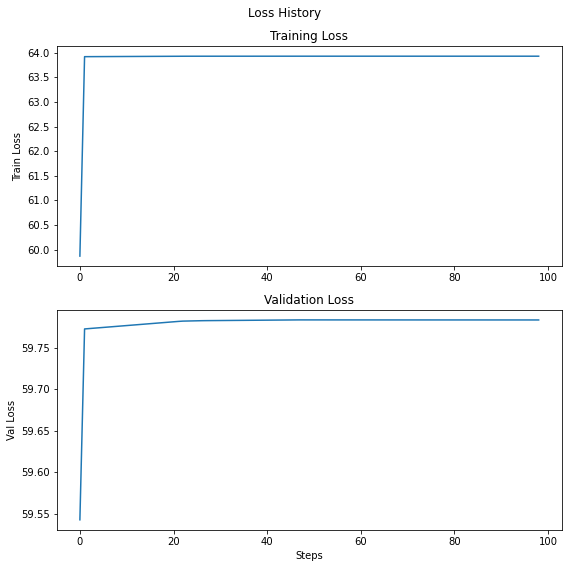

In [6]:
def plot_loss_history(per_epoch_loss_train, per_epoch_loss_val):
    """
    Plots the loss history after training is complete.
    """
    loss_hist = per_epoch_loss_train
    loss_hist_val = per_epoch_loss_val
    assert len(loss_hist) > 0, "Need to run training before plotting loss history"
    fig, axs = plt.subplots(2, figsize=(8,8))
    fig.suptitle('Loss History')
    axs[0].plot(np.arange(len(loss_hist)), loss_hist)
    axs[0].set_title('Training Loss')
    axs[1].plot(np.arange(len(loss_hist_val)), loss_hist_val)
    axs[1].set_title('Validation Loss')
    plt.xlabel('Steps')
    axs[0].set_ylabel('Train Loss')
    axs[1].set_ylabel('Val Loss')
    fig.tight_layout()
    
plot_loss_history(per_epoch_loss_train, per_epoch_loss_val)

### Hyperparameter Tuning
Now try out some more hyperparameters since the ones above clearly didn't work very well

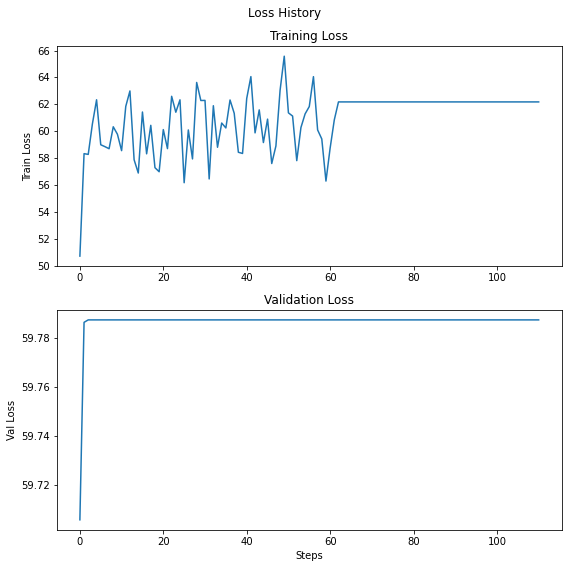

In [34]:
ae2 = NeuralNetwork(nn_arch,
                   lr = 0.1,
                   seed=42,
                   batch_size = 20,
                   epochs=50,
                   loss_function = "mean squared error")
per_epoch_loss_train2, per_epoch_loss_val2 = ae2.fit(X_train, X_train, X_val, X_val)
plot_loss_history(per_epoch_loss_train2, per_epoch_loss_val2)

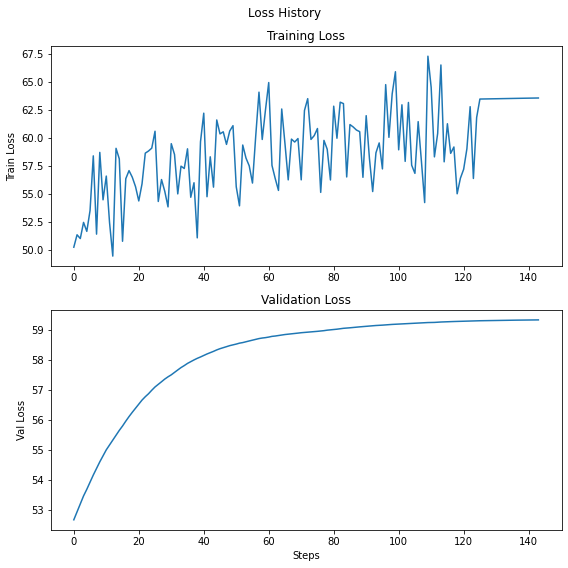

In [10]:
ae3 = NeuralNetwork(nn_arch,
                   lr = 0.0001,
                   seed=42,
                   batch_size = 10,
                   epochs=20,
                   loss_function = "mean squared error")
per_epoch_loss_train3, per_epoch_loss_val3 = ae3.fit(X_train, X_train, X_val, X_val)
plot_loss_history(per_epoch_loss_train3, per_epoch_loss_val3)

In [ ]:
nn_arch = [{'input_dim': 64, 'output_dim': 50, 'activation': 'relu'},
           {'input_dim': 50, 'output_dim': 35, 'activation': 'relu'},
           {'input_dim': 35, 'output_dim': 25, 'activation': 'relu'},
           {'input_dim': 25, 'output_dim': 16, 'activation': 'relu'},
           {'input_dim': 16, 'output_dim': 10, 'activation': 'relu'},
           {'input_dim': 10, 'output_dim': 16, 'activation': 'relu'},
           {'input_dim': 16, 'output_dim': 25, 'activation': 'relu'},
           {'input_dim': 25, 'output_dim': 35, 'activation': 'relu'},
           {'input_dim': 35, 'output_dim': 50, 'activation': 'relu'},
           {'input_dim': 50, 'output_dim': 64, 'activation': 'relu'}]

### Why were the final hyperparameters chosen?

Hyperparameters chosen: learning rate = ___ , batch size = ___ , epochs = ___ .
These hyperparameters were chosen because they give the lowest validation loss as well as a relatively low training loss.

### Quantify average reconstruction error

In [39]:
def avg_reconstruction_error(y, y_hat):
    avg_error = np.mean(y-y_hat)
    return avg_error

avg_error = avg_reconstruction_error(y, y_hat)
print("The average reconstruction error was " + str(avg_error)+".")

The average reconstruction error was 0.2222222222222222.
